**cardiac-surgery-and-percutaneous**
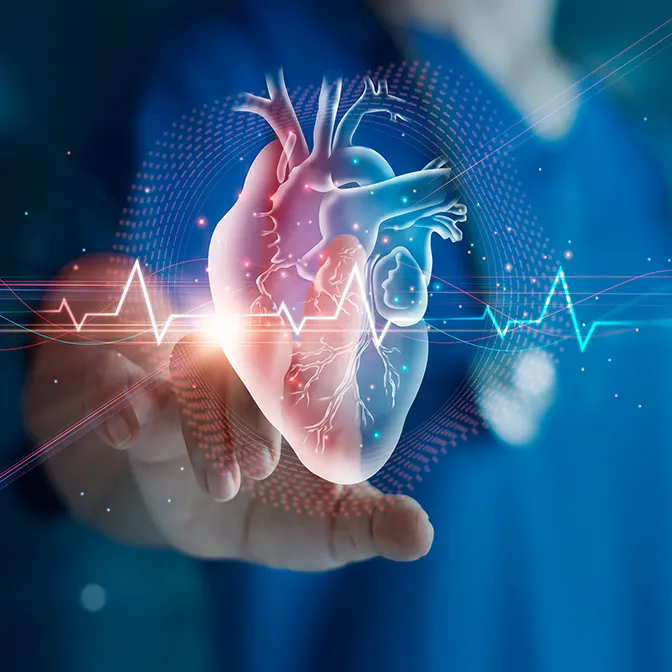
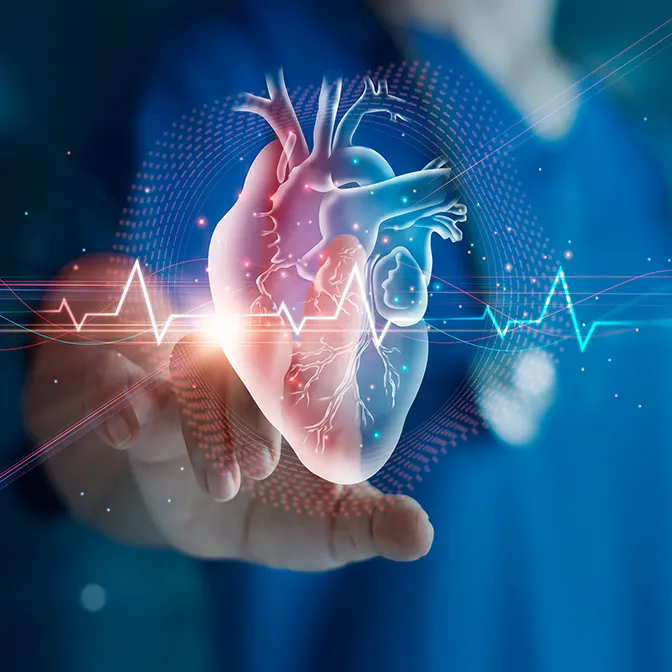

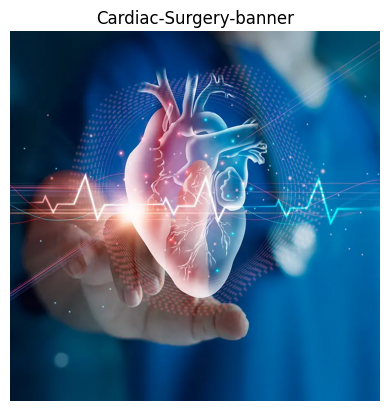

In [219]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/input/picture/Cardiac-Surgery-banner.webp')
plt.imshow(img)
plt.axis('off')
plt.title('Cardiac-Surgery-banner')
plt.show()

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 
from keras.models import Model
from keras.layers import Input,Dense
from keras.optimizers import Adam


In [221]:
data=pd.read_csv('/kaggle/input/cardiac-surgery-and-percutaneous/cardiac-surgery-and-percutaneous-coronary-interventions-by-hospital-beginning-2008-1.csv')

In [222]:
data.columns

Index(['Facility ID', 'Hospital Name', 'Detailed Region', 'Region',
       'Procedure', 'Year of Hospital Discharge', 'Number of Cases',
       'Number of Deaths', 'Observed Mortality Rate',
       'Expected Mortality Rate', 'Risk-Adjusted Mortality Rate',
       'Lower Limit of Confidence Interval',
       'Upper Limit of Confidence Interval', 'Comparison Results'],
      dtype='object')

In [223]:
data.drop(['Facility ID','Hospital Name','Detailed Region'], axis=1, inplace=True)

In [224]:
data.head()

,Region,Procedure,Year of Hospital Discharge,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results
0,Capital District,All PCI,2015,695,18,2.59,1.35,2.18,1.29,3.45,Rate significantly higher than Statewide Rate
1,Western NY - Rochester,All PCI,2015,336,1,0.30,0.93,0.37,0.00,2.03,Rate not different than Statewide Rate
2,Capital District,All PCI,2015,538,5,0.93,1.11,0.95,0.31,2.22,Rate not different than Statewide Rate
3,NY Metro - NYC,All PCI,2015,415,7,1.69,1.88,1.02,0.41,2.10,Rate not different than Statewide Rate
4,NY Metro - NYC,All PCI,2015,137,5,3.65,2.52,1.65,0.53,3.84,Rate not different than Statewide Rate


In [225]:
data.isna().sum()

Region                                 0
Procedure                              0
Year of Hospital Discharge             0
Number of Cases                        0
Number of Deaths                       0
Observed Mortality Rate                0
Expected Mortality Rate                0
Risk-Adjusted Mortality Rate           0
Lower Limit of Confidence Interval    31
Upper Limit of Confidence Interval    31
Comparison Results                     0
dtype: int64

**Fill null values with suitable values using a model**

In [226]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
data[['Lower Limit of Confidence Interval','Upper Limit of Confidence Interval']]=imputer.fit_transform(data[['Lower Limit of Confidence Interval','Upper Limit of Confidence Interval']])


In [227]:
data.isna().sum()

Region                                0
Procedure                             0
Year of Hospital Discharge            0
Number of Cases                       0
Number of Deaths                      0
Observed Mortality Rate               0
Expected Mortality Rate               0
Risk-Adjusted Mortality Rate          0
Lower Limit of Confidence Interval    0
Upper Limit of Confidence Interval    0
Comparison Results                    0
dtype: int64

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              1609 non-null   object 
 1   Procedure                           1609 non-null   object 
 2   Year of Hospital Discharge          1609 non-null   object 
 3   Number of Cases                     1609 non-null   int64  
 4   Number of Deaths                    1609 non-null   int64  
 5   Observed Mortality Rate             1609 non-null   float64
 6   Expected Mortality Rate             1609 non-null   float64
 7   Risk-Adjusted Mortality Rate        1609 non-null   float64
 8   Lower Limit of Confidence Interval  1609 non-null   float64
 9   Upper Limit of Confidence Interval  1609 non-null   float64
 10  Comparison Results                  1609 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory u

In [229]:
describe=data.describe()

In [230]:
 describe

,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000
mean,1086.437539,18.495960,2.036979,1.930137,2.067794,0.904157,5.592231
std,4372.660734,75.237519,1.728544,1.284396,1.828763,1.015098,8.790473
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.580000
25%,202.000000,3.000000,0.760000,0.880000,0.790000,0.160000,2.280000
50%,372.000000,6.000000,1.550000,1.480000,1.490000,0.510000,4.030000
75%,659.000000,13.000000,3.020000,2.820000,3.000000,1.370000,5.980000
max,54035.000000,1021.000000,16.670000,7.450000,14.590000,6.660000,140.570000


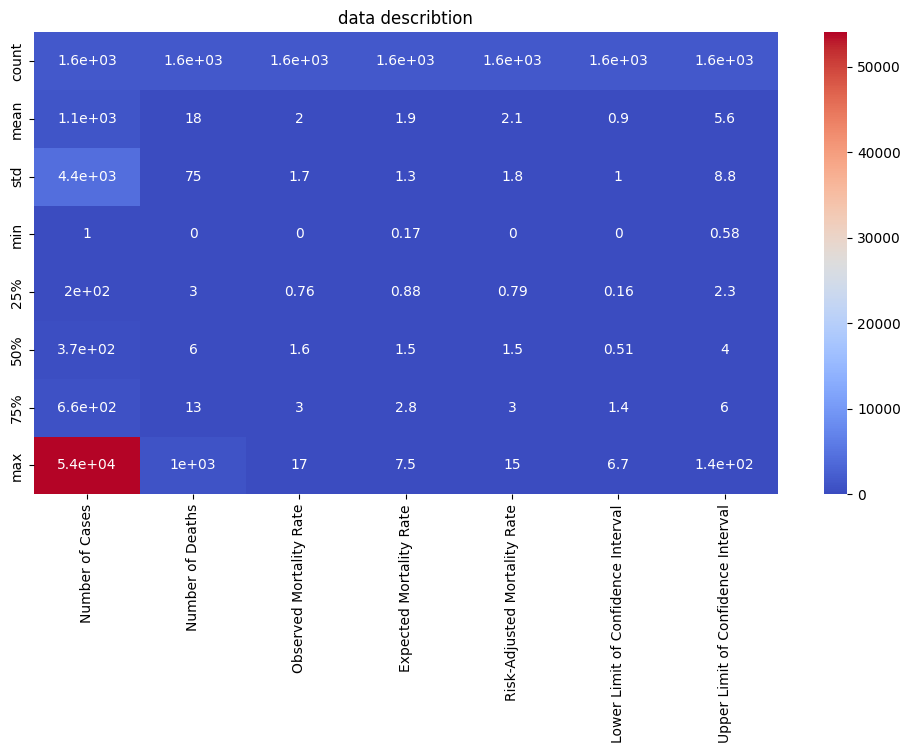

In [231]:
plt.figure(figsize=(12,6))
sns.heatmap(describe,annot=True,cmap='coolwarm')
plt.title('data describtion')
plt.show()

In [232]:
numeric_data=data.select_dtypes(include=['number'])
corr=numeric_data.corr()


**It is a way of visualizing relationships between variables. Colors and numerical values show the strength and direction of these relationships.Colors:**

* Navy blue: Strong positive correlation (if one variable increases, the other tends to increase as well).
* Dark red: Strong negative correlation (if one variable increases, the other tends to decrease).
* White/Beige: Weak or no attachment.
* Numbers: Values of correlation coefficients. 1 means a perfect positive correlation, -1 means an exact negative correlation, 0 means no correlation.
* Conclusion: Look for dark colors and numbers close to 1 or -1 for strong relationships.


**In this picture, for example, there is a strong positive correlation between "observed mortality rate" and "risk-adjusted mortality rate". This means that the higher the observed mortality rate, the risk-adjusted mortality rate tends to increase as well.**

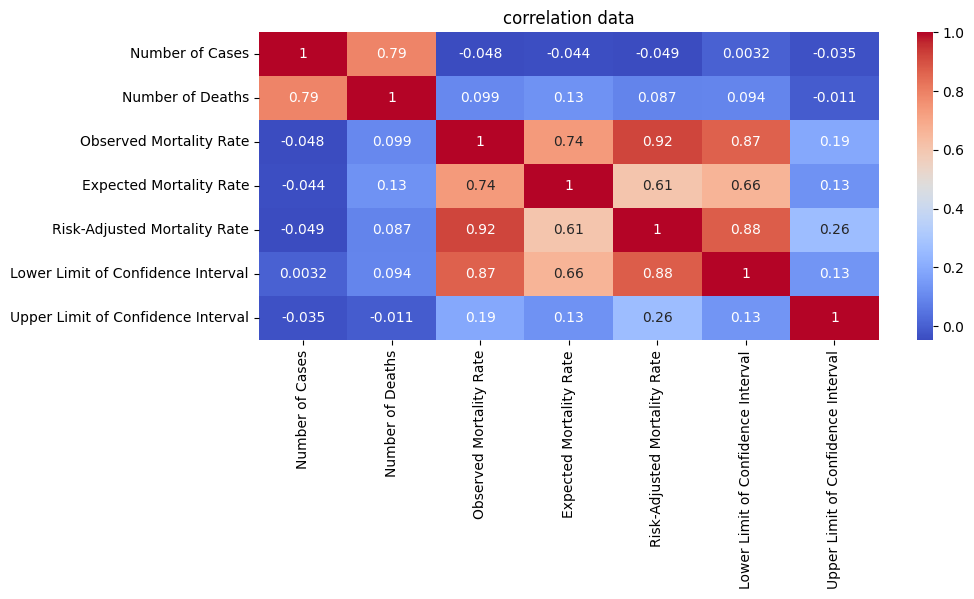

In [233]:
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation data')
plt.show()

**Outlier handling**

<Axes: >

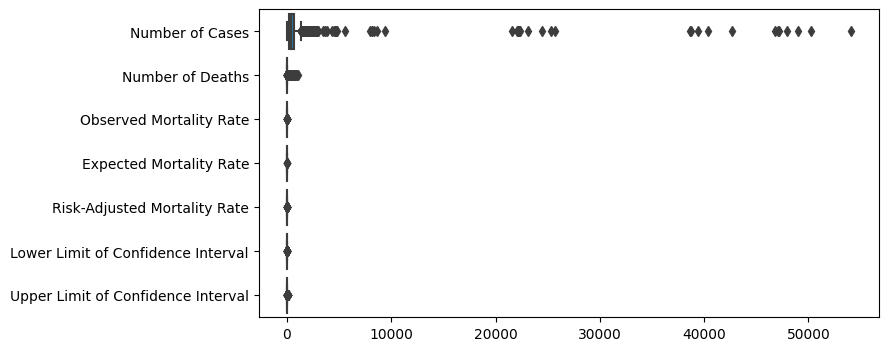

In [234]:
numeric_data=data.select_dtypes(include=['number'])
plt.figure(figsize=(8,4))
sns.boxplot(numeric_data,orient='h')


**i will handle the outliers by using Autoencoders**

In [235]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np


#  i will use StandardScaler for numeric data
scaler = StandardScaler()
Data_selected = scaler.fit_transform(numeric_data)

# determine data dimentions
input_dim = Data_selected.shape[1]
encoding_dim = 32

#  Autoencoder network
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)  
decoded = Dense(input_dim, activation='sigmoid')(encoded)  

#  Autoencoder model
autoencoder = Model(input_layer, decoded)

# (Encoder) model
encoder = Model(input_layer, encoded)

# build Decoder model by using encoder input
encoded_input = Input(shape=(encoding_dim,))  
decoder_layer = autoencoder.layers[-1] 
decoder = Model(encoded_input, decoder_layer(encoded_input))  # build Decoder model

# train Autoencoder on data
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(Data_selected, Data_selected, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.2424 - val_loss: 1.2851
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1509 - val_loss: 1.2586
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1144 - val_loss: 1.2331
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1560 - val_loss: 1.2089
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1476 - val_loss: 1.1856
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1058 - val_loss: 1.1643
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0669 - val_loss: 1.1432
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0522 - val_loss: 1.1212
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0502 - val_loss: 1.1006
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1283 - val_loss: 1.0810
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0282 - val_loss: 1.0622
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0240 - val_loss: 1.0437
Epoch 13/50


**detailed description of the different types of cases after Procedure**

In [236]:
Procedure_groupby=data.groupby('Procedure')[['Number of Cases','Number of Deaths']].mean()

In [237]:
Procedure_groupby

,Number of Cases,Number of Deaths
Procedure,,
All PCI,1623.697802,16.884615
CABG,422.133333,6.266667
Emergency PCI,771.788618,22.818428
Non-Emergency PCI,1355.087912,9.038462
TAVR,444.320000,21.120000
Valve or Valve/CABG,1079.311741,39.967611


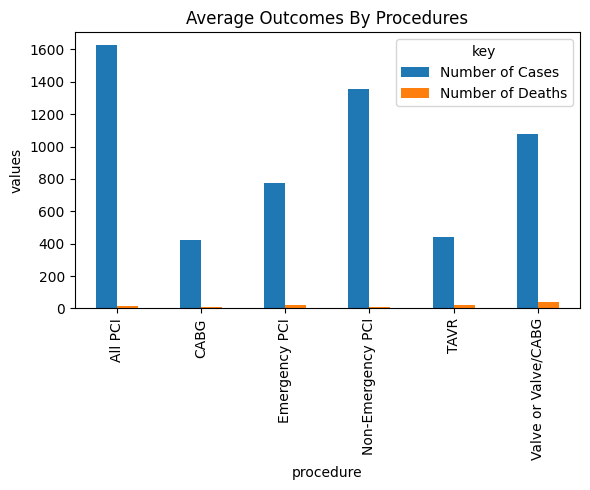

In [238]:
Procedure_groupby.plot(kind='bar',figsize=(6,5))
plt.title('Average Outcomes By Procedures')
plt.xlabel('procedure')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.legend(title='key')
plt.tight_layout()
plt.show()



In [239]:
Region_groupby=data.groupby('Region')[['Number of Cases','Number of Deaths']].mean()

In [240]:
Region_groupby

,Number of Cases,Number of Deaths
Region,,
Capital District,374.677596,7.114754
Central NY,468.960227,9.187500
NY Metro - Long Island,712.000000,11.727660
NY Metro - NYC,629.573529,9.718954
NY Metro - New Rochelle,361.222973,6.290541
New York State,28194.806452,480.000000
Western NY - Buffalo,467.438596,8.447368
Western NY - Rochester,577.890909,12.390909


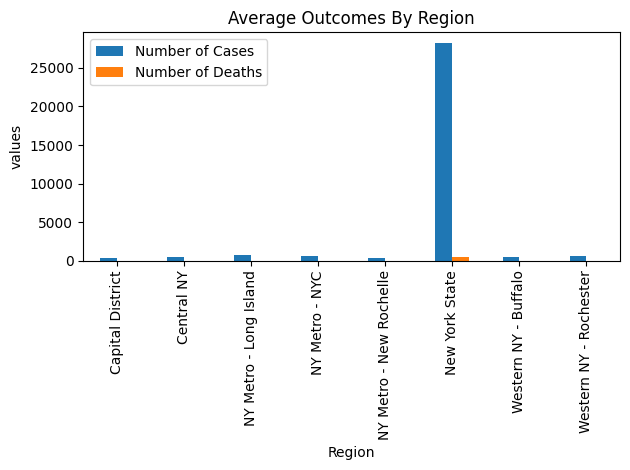

In [241]:
Region_groupby.plot(kind='bar')
plt.title('Average Outcomes By Region')
plt.xlabel('Region')
plt.ylabel('values')
plt.tight_layout()
plt.xticks(rotation=90)
plt.legend()
plt.show()

***from this chart, we see that most cases are from  New York State .as a result, it  alse has highest number of deaths.***

In [242]:
data.columns

Index(['Region', 'Procedure', 'Year of Hospital Discharge', 'Number of Cases',
       'Number of Deaths', 'Observed Mortality Rate',
       'Expected Mortality Rate', 'Risk-Adjusted Mortality Rate',
       'Lower Limit of Confidence Interval',
       'Upper Limit of Confidence Interval', 'Comparison Results'],
      dtype='object')

In [243]:
Region_Year=data.groupby('Region')[['Year of Hospital Discharge']].value_counts()

In [244]:
Region_Year

Region                  Year of Hospital Discharge
Capital District        2015                          20
                        2012                          19
                        2013                          19
                        2014                          18
                        2010                          17
                                                      ..
Western NY - Rochester  2008-2010                      7
                        2009-2011                      7
                        2010-2012                      7
                        2011-2013                      7
                        2012-2014                      7
Name: count, Length: 96, dtype: int64

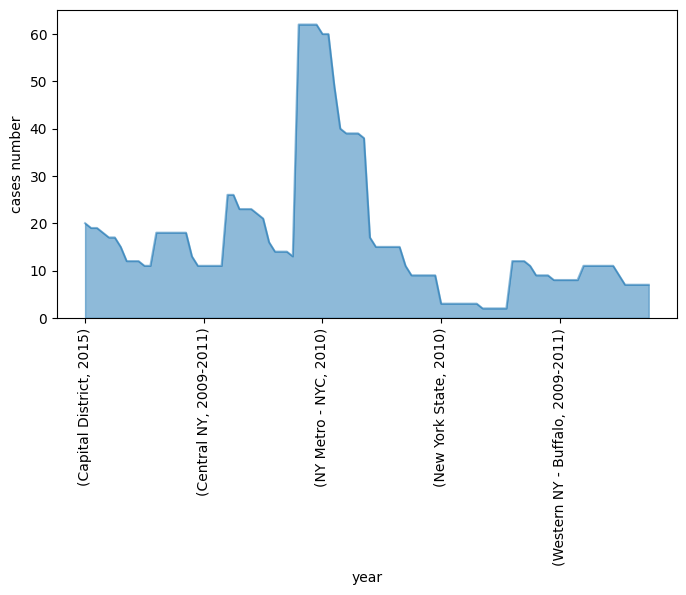

In [245]:
plt.figure(figsize=(8,4))
Region_Year.plot(kind='area',stacked=True,alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('cases number')
plt.show()

**In this diagram, we see that NY Metro-NYC, 2010 has the highest number of cases**

In [246]:
observed_mortality_rate =data.groupby('Procedure')['Observed Mortality Rate'].mean()

In [247]:
observed_mortality_rate

Procedure
All PCI                1.221813
CABG                   1.519208
Emergency PCI          3.121924
Non-Emergency PCI      0.719560
TAVR                   4.660400
Valve or Valve/CABG    3.796478
Name: Observed Mortality Rate, dtype: float64

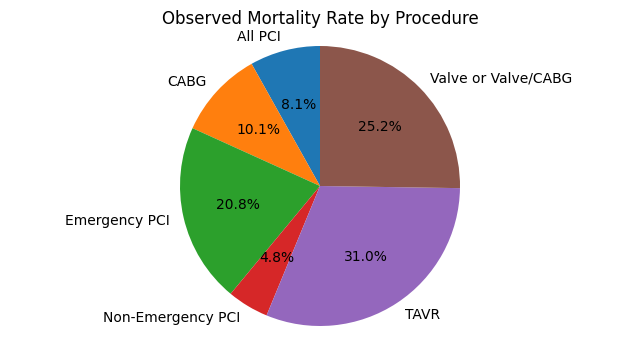

In [248]:
plt.figure(figsize=(8,4))
plt.pie(observed_mortality_rate,labels=observed_mortality_rate.index,autopct='%1.1f%%' ,startangle=90 )
plt.title('Observed Mortality Rate by Procedure')
plt.axis('equal')
plt.show()

In [249]:
mortality_rates  =data.groupby('Procedure')[['Observed Mortality Rate','Observed Mortality Rate']].mean()

In [250]:
mortality_rates

,Observed Mortality Rate,Observed Mortality Rate
Procedure,,
All PCI,1.221813,1.221813
CABG,1.519208,1.519208
Emergency PCI,3.121924,3.121924
Non-Emergency PCI,0.719560,0.719560
TAVR,4.660400,4.660400
Valve or Valve/CABG,3.796478,3.796478


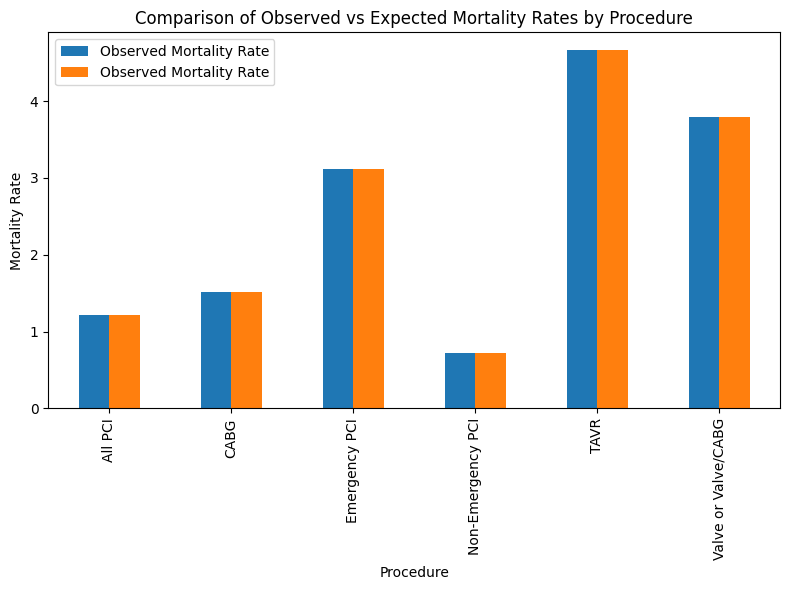

In [251]:
mortality_rates.plot(kind='bar',figsize=(8,6),width=0.5)
plt.title('Comparison of Observed vs Expected Mortality Rates by Procedure')
plt.xlabel('Procedure')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**prediction**

In [252]:
features =['Region', 'Procedure', 'Year of Hospital Discharge', 
     'Number of Cases', 'Number of Deaths', 
     'Expected Mortality Rate']
target =['Comparison Results']

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
model=XGBClassifier()
label_enc=LabelEncoder()
data['Region']=label_enc.fit_transform(data['Region'])
data['Procedure'] = label_enc.fit_transform(data['Procedure'])
data['Comparison Results'] = label_enc.fit_transform(data['Comparison Results'])
data['Year of Hospital Discharge'] = pd.to_datetime(data['Year of Hospital Discharge'], errors='coerce').dt.year
X = data[features]
Y = data[target]


In [261]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

In [262]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [263]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)

In [265]:
accuracy=accuracy_score(y_pred,y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.72%
